In [1]:
import math
import torch
import seaborn as sns
import matplotlib.pyplot as plt

tensor([[ 1.1958,  0.2372, -0.5331, -0.0801, -0.4030, -0.1577, -0.3509, -0.1371],
        [ 0.2372,  8.9129,  3.4839,  5.9114,  4.5780,  3.6685,  2.9921,  0.1327],
        [-0.5331,  3.4839,  4.8386,  2.7211,  4.5355,  2.3724,  3.9689,  0.1149],
        [-0.0801,  5.9114,  2.7211,  4.9768,  3.0612,  3.7380,  2.9302,  0.2784],
        [-0.4030,  4.5780,  4.5355,  3.0612,  5.6508,  1.9566,  3.3891, -0.0164],
        [-0.1577,  3.6685,  2.3724,  3.7380,  1.9566,  3.6339,  2.9197,  0.2224],
        [-0.3509,  2.9921,  3.9689,  2.9302,  3.3891,  2.9197,  4.0288,  0.1117],
        [-0.1371,  0.1327,  0.1149,  0.2784, -0.0164,  0.2224,  0.1117,  1.0000]])
tensor([[ 3.9983,  1.1898, -1.1174, -0.1757, -0.4041, -1.6537, -1.4702, -1.3333],
        [-3.1211, 19.5262,  5.5307, 17.5732,  5.4186,  3.1587,  1.5657, -8.2686],
        [-4.6051,  4.9934, 12.5978,  5.5755,  7.5883,  1.0911, 10.4358, -5.5454],
        [-3.2456, 11.2038,  2.5665, 14.4620,  1.0675,  7.8169,  4.8620, -4.8677],
        [-3.753

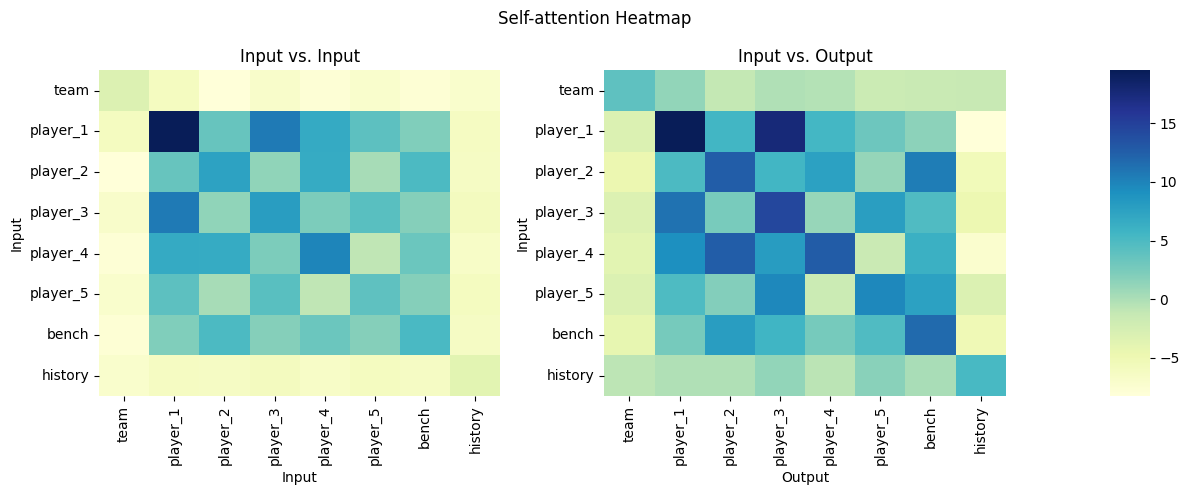

In [3]:
seq = torch.load("20_before.pt")
out = torch.load("20_after.pt")
column_name = ['team', 'player_1', 'player_2', 'player_3', 'player_4', 'player_5', 'bench', 'history']

with torch.no_grad():
  f,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 5), gridspec_kw={'width_ratios':[5,5,0.5]})
  f.suptitle("Self-attention Heatmap")
  map1 = seq @ seq.T
  print(map1)
  sns.heatmap(map1.numpy(), cmap="YlGnBu", cbar=False, ax=ax1, xticklabels=column_name, yticklabels=column_name)
  ax1.set_title("Input vs. Input")
  ax1.set_xlabel("Input")
  ax1.set_ylabel("Input")
  map2 = seq @ out.T
  print(map2)
  sns.heatmap(map2.numpy(), cmap="YlGnBu", ax=ax2, cbar_ax=ax3, xticklabels=column_name, yticklabels=column_name)
  ax2.set_title("Input vs. Output")
  ax2.set_xlabel("Output")
  ax2.set_ylabel("Input")
  f.tight_layout()

tensor([[ 0.3081,  2.3250, -0.9389,  1.7088],
        [-3.0957,  1.0397, -1.4860,  1.1511],
        [ 1.3967,  0.1278,  0.3840,  0.4269],
        [-3.2437, -1.9220,  0.7813, -2.1427]])
tensor([[-0.4503, -0.3970, -0.1875, -0.1661],
        [ 0.3807,  0.3691,  0.2226,  0.2175],
        [ 0.2265,  0.2310, -0.1716, -0.1800],
        [ 0.1020,  0.1325, -0.1723, -0.1632]])


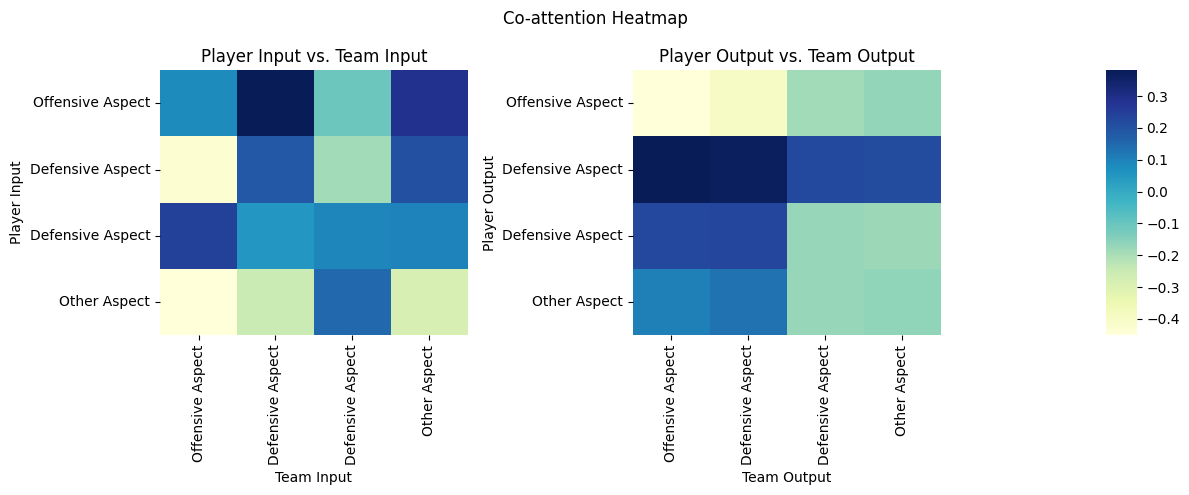

In [2]:
input_player = torch.load("10000_before_player.pt")
input_team = torch.load("10000_before_team.pt")
output_player = torch.load("10000_after_player.pt")
output_team = torch.load("10000_after_team.pt")
column_name = ['Offensive Aspect', 'Defensive Aspect', 'Error Aspect', 'Other Aspect']

input_player = input_player.reshape((4, 16))
input_team = input_team.reshape((4, 16))
output_player = output_player.reshape((4, 16))
output_team = output_team.reshape((4, 16))

with torch.no_grad():
  f,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 5), gridspec_kw={'width_ratios':[5,5,0.5]})
  f.suptitle("Co-attention Heatmap")
  map1 = input_player @ input_team.T
  print(map1)
  sns.heatmap(map1.numpy(), cmap="YlGnBu", cbar=False, ax=ax1, xticklabels=column_name, yticklabels=column_name)
  ax1.set_title("Player Input vs. Team Input")
  ax1.set_xlabel("Team Input")
  ax1.set_ylabel("Player Input")
  map2 = output_player @ output_team.T
  print(map2)
  sns.heatmap(map2.numpy(), cmap="YlGnBu", ax=ax2, cbar_ax=ax3, xticklabels=column_name, yticklabels=column_name)
  ax2.set_title("Player Output vs. Team Output")
  ax2.set_xlabel("Team Output")
  ax2.set_ylabel("Player Output")
  f.tight_layout()